<a href="https://colab.research.google.com/github/HassanFrazKhan/ADS-1_Assignment3/blob/main/Assignment_3_Individual_project_Large_Language_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **IMPORTING LIBRARY**

In [1]:
import numpy as np
import pandas as pd
#for pytorch
import torch
import torch.nn as nn
device = torch.device("cuda")

#for BERT
import transformers
from transformers import AutoModel, BertTokenizerFast
from sklearn.model_selection import train_test_split
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
# optimizer from hugging face transformers
from transformers import AdamW
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

**Reading The Data**

In [2]:
from google.colab import drive
import pandas as pd
import os


drive.mount('/content/drive')

df=pd.read_csv('/content/drive/My Drive/Assignment/Sentiment Analysis.csv')
df.head()

Mounted at /content/drive


,sentence,label
0,Ok brokeback mountain is such a horrible movie.,0
1,Brokeback Mountain was so awesome.,1
2,friday hung out with kelsie and we went and sa...,0
3,I am going to start reading the Harry Potter s...,1
4,"Is it just me, or does Harry Potter suck?...",0


from matplotlib import pyplot as plt
_df_0['label'].plot(kind='hist', bins=20, title='label')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('sentence').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['label'].plot(kind='line', figsize=(8, 4), title='label')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_3['sentence'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_3, x='label', y='sentence', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

### **Data describe**

In [3]:
df.describe()

,label
count,5668.000000
mean,0.565279
std,0.495764
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


from matplotlib import pyplot as plt
_df_4['label'].plot(kind='hist', bins=20, title='label')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5['label'].plot(kind='line', figsize=(8, 4), title='label')
plt.gca().spines[['top', 'right']].set_visible(False)

(array([2113., 1092.,  912.,  692.,  276.,  253.,  155.,   29.,  142.,
           4.]),
 array([ 3. ,  6.7, 10.4, 14.1, 17.8, 21.5, 25.2, 28.9, 32.6, 36.3, 40. ]),
 <BarContainer object of 10 artists>)

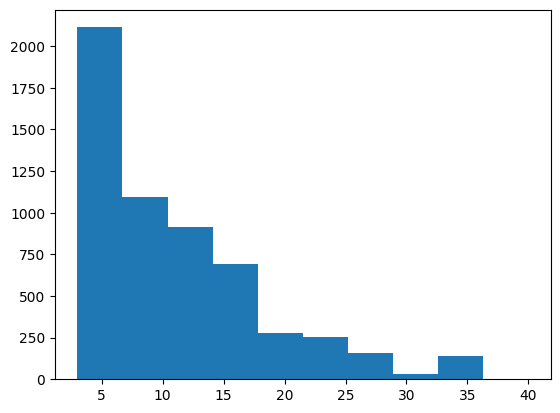

In [4]:
lens=[len(i.split()) for i in df.sentence]
import matplotlib.pyplot as plt
plt.hist(lens)

### **Installing Transformers**

In [5]:
!pip install transformers

## **Train-Test-Split**

In [6]:
# split into train, validation and test sets in the ration 70 : 15 : 15
train_text, temp_text, train_labels, temp_labels = train_test_split(df['sentence'], df['label'],random_state=2021,test_size=0.3,stratify=df['label'])


val_text, test_text, val_labels, test_labels = train_test_split(temp_text, temp_labels,random_state=2021,test_size=0.5,stratify=temp_labels)

### **IMPORTING BERT PRE-TRAINED MODEL**

In [7]:
# import BERT-base pretrained model
bert = AutoModel.from_pretrained('bert-base-uncased')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

### **IMPORTING BERT TOKENIZER & Tokenizing The Data**

In [8]:
# Load the BERT tokenizer
tokenizer = BertTokenizerFast.from_pretrained('bert-base-uncased')

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

(array([1504.,  701.,  572.,  521.,  164.,  215.,  117.,   63.,  104.,
           6.]),
 array([ 3. ,  6.5, 10. , 13.5, 17. , 20.5, 24. , 27.5, 31. , 34.5, 38. ]),
 <BarContainer object of 10 artists>)

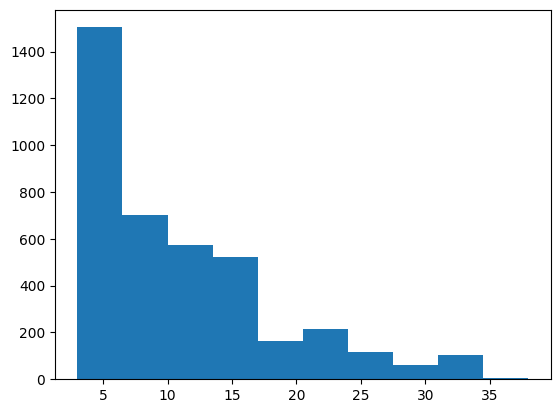

In [9]:
train_lens=[len(i.split()) for i in train_text]
plt.hist(train_lens)

In [10]:
pad_len=17

In [11]:
# tokenize and encode sequences
tokens_train = tokenizer.batch_encode_plus(train_text.tolist(),max_length = pad_len,pad_to_max_length=True,truncation=True)

tokens_val = tokenizer.batch_encode_plus(val_text.tolist(),max_length = pad_len,pad_to_max_length=True,truncation=True)

tokens_test = tokenizer.batch_encode_plus(test_text.tolist(),max_length = pad_len,pad_to_max_length=True,truncation=True)

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2760: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


In [12]:
train_seq = torch.tensor(tokens_train['input_ids'])
train_mask = torch.tensor(tokens_train['attention_mask'])
train_y = torch.tensor(train_labels.tolist())

val_seq = torch.tensor(tokens_val['input_ids'])
val_mask = torch.tensor(tokens_val['attention_mask'])
val_y = torch.tensor(val_labels.tolist())

test_seq = torch.tensor(tokens_test['input_ids'])
test_mask = torch.tensor(tokens_test['attention_mask'])
test_y = torch.tensor(test_labels.tolist())

### **Parameters**

In [13]:
#define a batch size
batch_size = 64

# wrap tensors
train_data = TensorDataset(train_seq, train_mask, train_y)

# sampler for sampling the data during training
train_sampler = RandomSampler(train_data)

# dataLoader for train set
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)

# wrap tensors
val_data = TensorDataset(val_seq, val_mask, val_y)

# sampler for sampling the data during training
val_sampler = SequentialSampler(val_data)

# dataLoader for validation set
val_dataloader = DataLoader(val_data, sampler = val_sampler, batch_size=batch_size)


# freeze the BERT architecture

for param in bert.parameters():
    param.requires_grad = False


### **BERT Architecture**

In [14]:
class BERT_architecture(nn.Module):

    def __init__(self, bert):

      super(BERT_architecture, self).__init__()

      self.bert = bert

      # dropout layer
      self.dropout = nn.Dropout(0.2)

      # relu activation function
      self.relu =  nn.ReLU()

      # dense layer 1
      self.fc1 = nn.Linear(768,512)

      # dense layer 2 (Output layer)
      self.fc2 = nn.Linear(512,2)

      #softmax activation function
      self.softmax = nn.LogSoftmax(dim=1)

    #define the forward pass
    def forward(self, sent_id, mask):

      #pass the inputs to the model
      _, cls_hs = self.bert(sent_id, attention_mask=mask, return_dict=False)

      x = self.fc1(cls_hs)

      x = self.relu(x)

      x = self.dropout(x)

      # output layer
      x = self.fc2(x)

      # apply softmax activation
      x = self.softmax(x)

      return x

In [15]:
!sudo apt install cuda


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  cpp-12 cuda-12-6 cuda-cccl-12-6 cuda-command-line-tools-12-6
  cuda-compiler-12-6 cuda-crt-12-6 cuda-cudart-12-6 cuda-cudart-dev-12-6
  cuda-cuobjdump-12-6 cuda-cupti-12-6 cuda-cupti-dev-12-6 cuda-cuxxfilt-12-6
  cuda-demo-suite-12-6 cuda-documentation-12-6 cuda-driver-dev-12-6
  cuda-gdb-12-6 cuda-libraries-12-6 cuda-libraries-dev-12-6 cuda-nsight-12-6
  cuda-nsight-compute-12-6 cuda-nsight-systems-12-6 cuda-nvcc-12-6
  cuda-nvdisasm-12-6 cuda-nvml-dev-12-6 cuda-nvprof-12-6 cuda-nvprune-12-6
  cuda-nvrtc-12-6 cuda-nvrtc-dev-12-6 cuda-nvtx-12-6 cuda-nvvm-12-6
  cuda-nvvp-12-6 cuda-opencl-12-6 cuda-opencl-dev-12-6 cuda-profiler-api-12-6
  cuda-runtime-12-6 cuda-sanitizer-12-6 cuda-toolkit-12-6
  cuda-toolkit-12-6-config-common cuda-tools-12-6 cuda-visual-tools-12-6
  dctrl-tools default-jre default-jre-headless dkms fakeroot fonts-dejavu

In [16]:
import torch

# Check if CUDA is available
print("CUDA Available:", torch.cuda.is_available())

# Print the CUDA version used by PyTorch
print("CUDA Version:", torch.version.cuda)

# Print the GPU name
if torch.cuda.is_available():
    print("GPU Name:", torch.cuda.get_device_name(0))
else:
    print("No GPU detected. Using CPU.")


CUDA Available: True
CUDA Version: 12.1
GPU Name: Tesla T4


In [17]:
import torch
print(torch.__version__)
print(torch.cuda.is_available())


2.3.1+cu121
True


In [20]:
# pass the pre-trained BERT to our define architecture
model = BERT_architecture(bert)

# push the model to GPU
model = model.to(device)

In [22]:
# define the optimizer
optimizer = AdamW(model.parameters(),lr = 1e-5)

In [23]:
from sklearn.utils.class_weight import compute_class_weight
#compute the class weights
class_weights = compute_class_weight(class_weight = "balanced",classes = np.unique(train_labels),y = train_labels)
print("class weights are {} for {}".format(class_weights,np.unique(train_labels)))

class weights are [1.14985507 0.88470116] for [0 1]


In [24]:
#count of both the categories of training labels
pd.value_counts(train_labels)


<ipython-input-24-79f56b9380c8>:2: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(train_labels)


,count
label,
1,2242
0,1725


In [25]:
#wrap class weights in tensor
weights= torch.tensor(class_weights,dtype=torch.float)

# push weights to GPU
weights = weights.to(device)

# define loss function
# add weights to handle the "imbalance" in the dataset
cross_entropy  = nn.NLLLoss(weight=weights)

# number of training epochs
epochs = 100

In [28]:
# function to train the model
def train():

  model.train()

  total_loss, total_accuracy = 0, 0

  # empty list to save model predictions
  total_preds=[]

  # iterate over batches
  for step,batch in enumerate(train_dataloader):

    # progress update after every 50 batches.
    if step % 50 == 0 and not step == 0:
      print('  Batch {:>5,}  of  {:>5,}.'.format(step, len(train_dataloader)))

    # push the batch to gpu
    batch = [r.to(device) for r in batch]

    sent_id, mask, labels = batch
    # clear previously calculated gradients
    model.zero_grad()

    # get model predictions for the current batch
    preds = model(sent_id, mask)

    # compute the loss between actual and predicted values
    loss = cross_entropy(preds, labels)

    # add on to the total loss
    total_loss = total_loss + loss.item()

    # backward pass to calculate the gradients
    loss.backward()

    # clip the the gradients to 1.0. It helps in preventing the exploding gradient problem
    torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

    # update parameters
    optimizer.step()

    # model predictions are stored on GPU. So, push it to CPU
    preds=preds.detach().cpu().numpy()

    # append the model predictions
    total_preds.append(preds)

  # compute the training loss of the epoch
  avg_loss = total_loss / len(train_dataloader)

  # predictions are in the form of (no. of batches, size of batch, no. of classes).
  # reshape the predictions in form of (number of samples, no. of classes)
  total_preds  = np.concatenate(total_preds, axis=0)

  #returns the loss and predictions
  return avg_loss, total_preds

In [34]:
 # function for evaluating the model
def evaluate():

  print("\nEvaluating...")

  # deactivate dropout layers
  model.eval()

  total_loss, total_accuracy = 0, 0

  # empty list to save the model predictions
  total_preds = []

  # iterate over batches
  for step,batch in enumerate(val_dataloader):
   # Progress update every 50 batches.
    if step % 50 == 0 and not step == 0:

      # # Calculate elapsed time in minutes.
      # elapsed = format_time(time.time() - t0)

      # Report progress.
      print('  Batch {:>5,}  of  {:>5,}.'.format(step, len(val_dataloader)))

    # push the batch to gpu
    batch = [t.to(device) for t in batch]

    sent_id, mask, labels = batch

    # deactivate autograd
    with torch.no_grad():

      # model predictions
      preds = model(sent_id, mask)

      # compute the validation loss between actual and predicted values
      loss = cross_entropy(preds,labels)

      total_loss = total_loss + loss.item()

      preds = preds.detach().cpu().numpy()

      total_preds.append(preds)

  # compute the validation loss of the epoch
  avg_loss = total_loss / len(val_dataloader)

  # reshape the predictions in form of (number of samples, no. of classes)
  total_preds  = np.concatenate(total_preds, axis=0)

  return avg_loss, total_preds

### **Training Of BERT Model**

In [35]:
# set initial loss to infinite
best_valid_loss = float('inf')

# empty lists to store training and validation loss of each epoch
train_losses=[]
valid_losses=[]

#for each epoch
for epoch in range(epochs):

    print('\n Epoch {:} / {:}'.format(epoch + 1, epochs))

    #train model
    train_loss, _ = train()

    #evaluate model
    valid_loss, _ = evaluate()

    #save the best model
    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 'saved_weights.pt')

    # append training and validation loss
    train_losses.append(train_loss)
    valid_losses.append(valid_loss)

    print('\nTraining Loss: {}'.format(train_loss))
    print('Validation Loss: {}'.format(valid_loss))



 Epoch 1 / 100
  Batch    50  of     62.

Evaluating...

Training Loss: 0.6936511810748808
Validation Loss: 0.6858944126537868

 Epoch 2 / 100
  Batch    50  of     62.

Evaluating...

Training Loss: 0.6860743905267408
Validation Loss: 0.6789925992488861

 Epoch 3 / 100
  Batch    50  of     62.

Evaluating...

Training Loss: 0.6819388760674384
Validation Loss: 0.6729849747249058

 Epoch 4 / 100
  Batch    50  of     62.

Evaluating...

Training Loss: 0.6771109267588584
Validation Loss: 0.6675937729222434

 Epoch 5 / 100
  Batch    50  of     62.

Evaluating...

Training Loss: 0.675470725182564
Validation Loss: 0.6648777297564915

 Epoch 6 / 100
  Batch    50  of     62.

Evaluating...

Training Loss: 0.6725240618951859
Validation Loss: 0.6598499161856515

 Epoch 7 / 100
  Batch    50  of     62.

Evaluating...

Training Loss: 0.6682709859263513
Validation Loss: 0.6565905298505511

 Epoch 8 / 100
  Batch    50  of     62.

Evaluating...

Training Loss: 0.6654687148909415
Validation Lo

### **Training Graph**

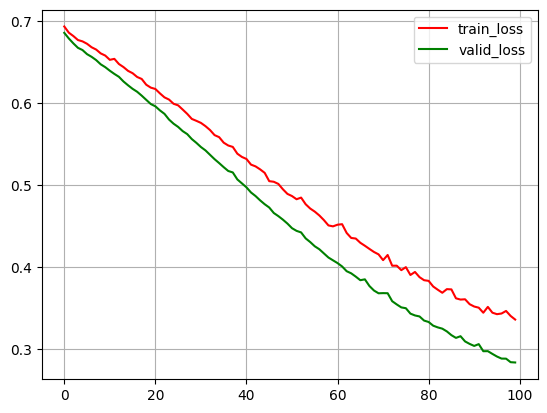

In [36]:
from matplotlib import pyplot as plt
plt.plot(train_losses,color = 'red',label = 'train_loss')
plt.plot(valid_losses,color = 'green',label = 'valid_loss')
plt.grid()
plt.legend()
plt.show()

**Saving The Models**

In [37]:
#load weights of best model
path = 'saved_weights.pt'
model.load_state_dict(torch.load(path))

<All keys matched successfully>

### **Prediction**

In [38]:
# get predictions for test data
with torch.no_grad():
  preds = model(test_seq.to(device), test_mask.to(device))
  preds = preds.detach().cpu().numpy()

In [40]:
from sklearn.metrics import classification_report,accuracy_score

### **Evaluation**

In [41]:
pred = np.argmax(preds, axis = 1)
# Calculate classification report and accuracy
report = classification_report(test_y, pred, output_dict=True)
accuracy = accuracy_score(test_y, pred)

# Print classification report
print("Classification Report:")
print(classification_report(test_y, pred))

# Print accuracy
print("Accuracy:", accuracy)

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.88      0.90       370
           1       0.91      0.94      0.93       481

    accuracy                           0.91       851
   macro avg       0.91      0.91      0.91       851
weighted avg       0.91      0.91      0.91       851

Accuracy: 0.9142185663924794


In [42]:
Accuracy: 0.9106933019976499
# Create a DataFrame to store metrics
metrics_df = pd.DataFrame(report).transpose()

# Add accuracy to the DataFrame
metrics_df.loc['accuracy'] = accuracy

# Display the DataFrame
print("\nMetrics DataFrame:")
metrics_df


Metrics DataFrame:


,precision,recall,f1-score,support
0,0.915966,0.883784,0.899587,370.000000
1,0.912955,0.937630,0.925128,481.000000
accuracy,0.914219,0.914219,0.914219,0.914219
macro avg,0.914461,0.910707,0.912358,851.000000
weighted avg,0.914265,0.914219,0.914023,851.000000


### **Prediction Sample**

In [43]:
def convert_predictions(binary_predictions):
    return np.where(binary_predictions == 0, "negative", "True")
pred_mapped = convert_predictions(pred)
pred_mapped[:50]

array(['negative', 'negative', 'True', 'True', 'negative', 'negative',
       'True', 'True', 'True', 'negative', 'negative', 'negative', 'True',
       'negative', 'negative', 'True', 'negative', 'True', 'negative',
       'True', 'True', 'negative', 'negative', 'negative', 'True',
       'negative', 'True', 'True', 'negative', 'True', 'negative',
       'negative', 'negative', 'negative', 'negative', 'negative',
       'negative', 'negative', 'True', 'True', 'True', 'True', 'True',
       'True', 'True', 'negative', 'negative', 'True', 'True', 'True'],
      dtype='<U8')